# Support Vector Machines

**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Importing and Analyzing the Data**

In [2]:
data = pd.read_csv("mouse_viral_study.csv")
data

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


**Create the plane between the two classes**

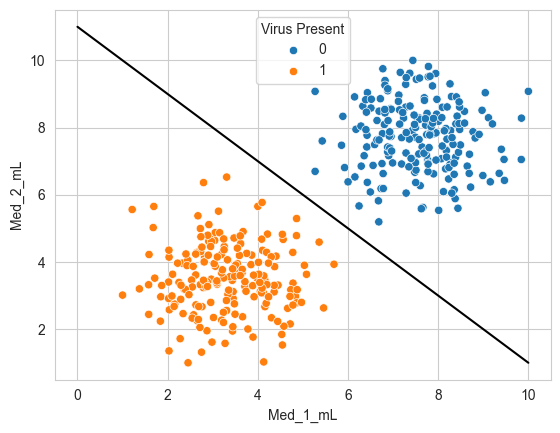

In [3]:
plt.figure(dpi=100)
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=data)

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, "black");

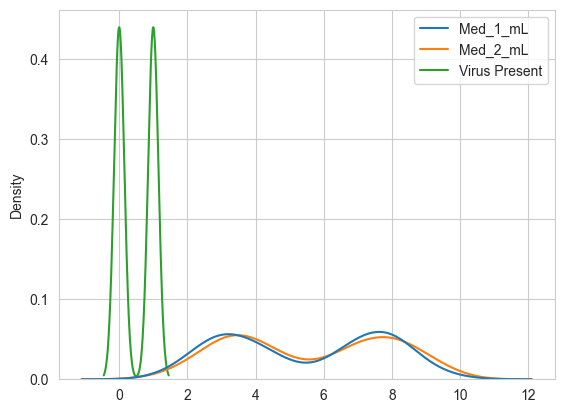

In [4]:
plt.figure(dpi=100)
sns.kdeplot(data);

**Splitting the data into the Independent and Dependent Features**

In [5]:
x = data.drop(columns="Virus Present")
y = data["Virus Present"]

**Implementing the Model with kernel 'linear' and C '1000' with plotting the boundary**

In [6]:
from sklearn.svm import SVC
svc_model = SVC(kernel="linear", C=1000)
svc_model.fit(x, y)

SVC(C=1000, kernel='linear')

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


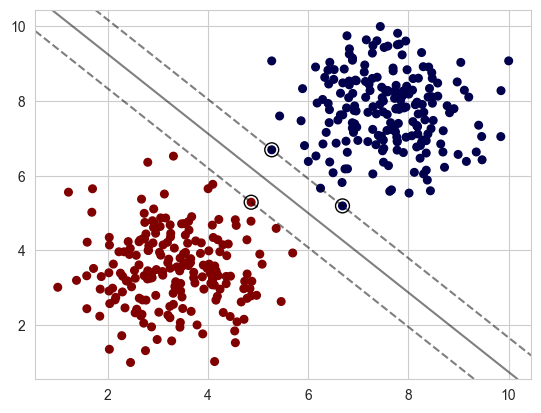

In [7]:
from svm_margin_plot import plot_svm_boundary
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Implementing the model with kernel 'linear' and C '0.05'**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


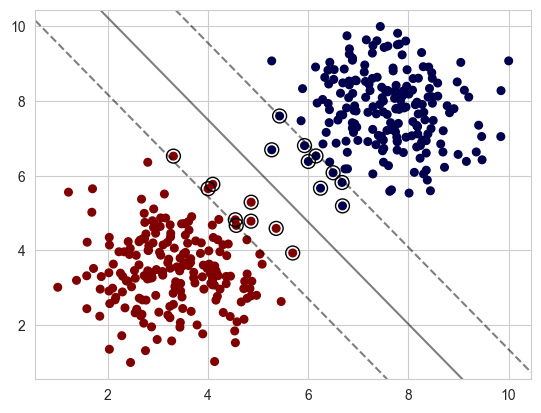

In [8]:
svc_model = SVC(kernel="linear", C=0.05)
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Implementing the kernel 'rbf'**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


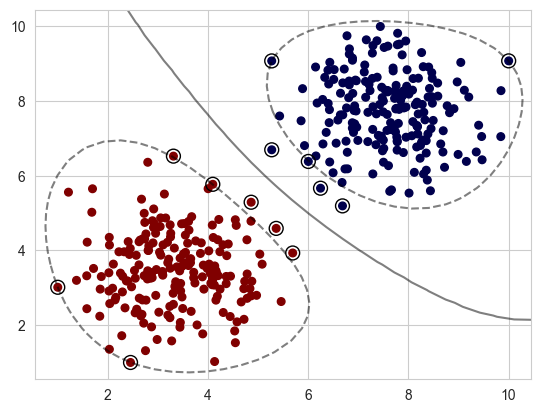

In [9]:
svc_model = SVC(kernel="rbf", C=1)
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Implementing the kernel 'rbf' and gamma 'auto' means 0.5 because of two features**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


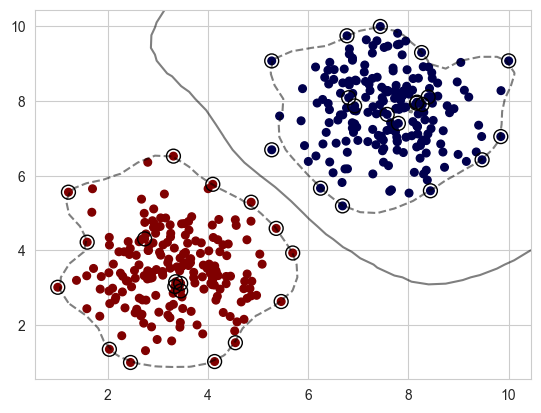

In [10]:
svc_model = SVC(kernel="rbf", C=1, gamma="auto")
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Implementing the kernel 'rbf' and gamma '0.1' (scaling)**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


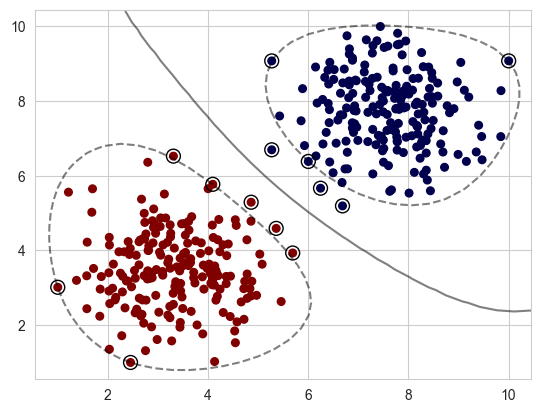

In [11]:
svc_model = SVC(kernel="rbf", C=1, gamma=0.1)
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Importing the kernel 'rbf' and gamma of 0.9 (scaling)**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


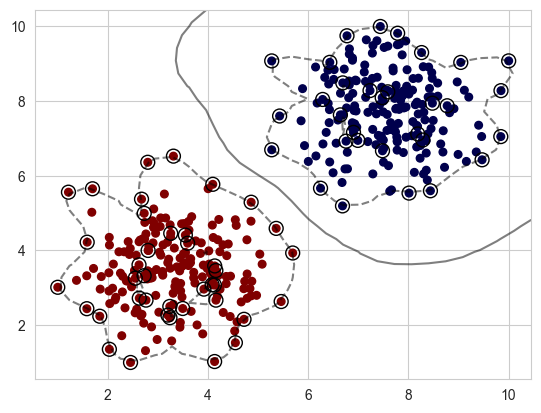

In [12]:
svc_model = SVC(kernel="rbf", C=1, gamma=0.9)
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Importing the kernel 'sigmoid'**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


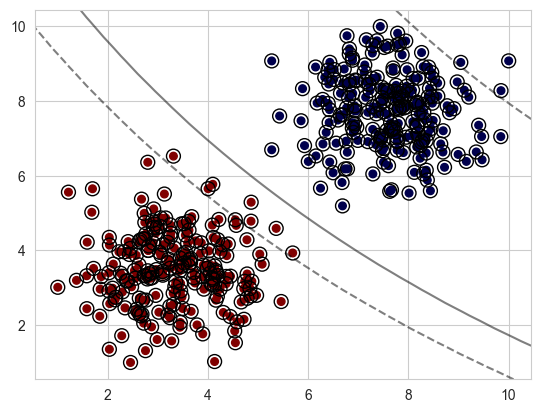

In [13]:
svc_model = SVC(kernel="sigmoid")
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Importing the kernel 'poly' and degree of 2**

C:\Users\drkum\DataspellProjects\machine_learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


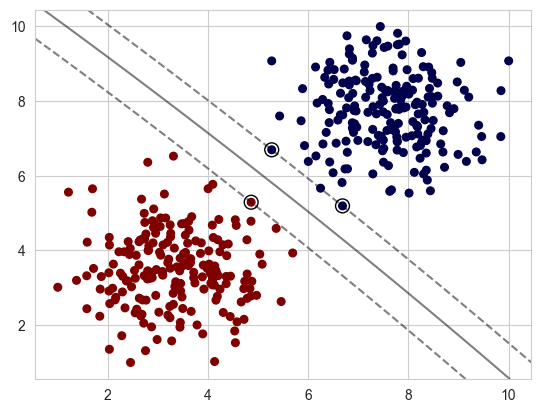

In [14]:
svc_model = SVC(kernel="poly", C=1, degree=2)
svc_model.fit(x, y)
plt.figure(dpi=100)
plot_svm_boundary(svc_model, x, y);

**Splitting the Independent and Dependent Features into Training and Testing Data** 

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Implementing the Grid Search CV and Hyper Parameters to train**

In [16]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'linear']}

In [17]:
grid_model = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [18]:
grid_model.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [19]:
y_pred = grid_model.predict(x_test)

**Evaluating the Performance Matrices**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix -\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report -\n", classification_report(y_test, y_pred))

Confusion Matrix -
 [[41  0]
 [ 0 39]]

Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80
